# Electronic Dance Music - Subgenre classification model and prediction

## data from: https://www.kaggle.com/caparrini/beatsdataset
## summary of dataset and feature descriptions: https://github.com/tyiannak/pyAudioAnalysis

First: import data, import necessary libraries, and do some initial Exploratory Data Analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
edm = pd.read_csv('beatsdataset.csv')

In [3]:
edm.head()

,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,...,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,BigRoom
1,1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,...,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,BigRoom
2,2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,...,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,BigRoom
3,3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,...,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,BigRoom
4,4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,...,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,BigRoom


In [4]:
edm.describe()

,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,1149.500000,0.107736,0.104252,3.110511,0.235583,0.241407,0.906137,0.010705,0.190545,-23.166806,...,0.067540,0.002632,0.004919,0.009917,0.030616,0.004141,0.019852,148.225537,0.169310,120.948696
std,664.097131,0.037105,0.040966,0.070925,0.043585,0.019559,0.341512,0.005387,0.080169,1.177417,...,0.020457,0.001806,0.002664,0.004558,0.011572,0.002492,0.004403,46.641160,0.056806,17.101925
min,0.000000,0.017122,0.004948,2.746105,0.082685,0.151738,0.034159,0.002689,0.011842,-30.378954,...,0.017597,0.000162,0.000500,0.002169,0.004175,0.000277,0.005532,63.157895,0.073337,61.000000
25%,574.750000,0.080967,0.075864,3.065538,0.206125,0.229695,0.656444,0.006757,0.131162,-23.933393,...,0.052684,0.001449,0.003116,0.006996,0.022527,0.002450,0.016837,120.000000,0.126604,117.000000
50%,1149.500000,0.107538,0.099977,3.117441,0.237552,0.243182,0.911085,0.009582,0.186282,-23.085501,...,0.065773,0.002220,0.004425,0.008975,0.028599,0.003641,0.019591,133.333333,0.156258,125.000000
75%,1724.250000,0.132890,0.128128,3.163833,0.266697,0.255137,1.155127,0.013129,0.243637,-22.279678,...,0.080211,0.003338,0.006053,0.011637,0.036699,0.005206,0.022443,150.000000,0.200570,129.000000
max,2299.000000,0.246659,0.281533,3.254153,0.373731,0.300685,1.958840,0.052735,0.483745,-20.129200,...,0.143270,0.027122,0.027724,0.047819,0.096128,0.028739,0.040736,600.000000,0.422992,188.000000


In [5]:
edm.info()
#Note that all fields are floats with exception to Unnamed Titles and Class (aka subgenre/Target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 73 columns):
Unnamed: 0                2300 non-null int64
1-ZCRm                    2300 non-null float64
2-Energym                 2300 non-null float64
3-EnergyEntropym          2300 non-null float64
4-SpectralCentroidm       2300 non-null float64
5-SpectralSpreadm         2300 non-null float64
6-SpectralEntropym        2300 non-null float64
7-SpectralFluxm           2300 non-null float64
8-SpectralRolloffm        2300 non-null float64
9-MFCCs1m                 2300 non-null float64
10-MFCCs2m                2300 non-null float64
11-MFCCs3m                2300 non-null float64
12-MFCCs4m                2300 non-null float64
13-MFCCs5m                2300 non-null float64
14-MFCCs6m                2300 non-null float64
15-MFCCs7m                2300 non-null float64
16-MFCCs8m                2300 non-null float64
17-MFCCs9m                2300 non-null float64
18-MFCCs10m               2300 

In [6]:
edm['class'].value_counts()
#Familiarization with names and checking even-ness of sample size of target variable values

DrumAndBass             100
HardcoreHardTechno      100
ProgressiveHouse        100
FunkRAndB               100
House                   100
TechHouse               100
Trance                  100
PsyTrance               100
ElectroHouse            100
FutureHouse             100
BigRoom                 100
HipHop                  100
IndieDanceNuDisco       100
Techno                  100
GlitchHop               100
DeepHouse               100
Dubstep                 100
Minimal                 100
ReggaeDub               100
ElectronicaDowntempo    100
HardDance               100
Breaks                  100
Dance                   100
Name: class, dtype: int64

In [7]:
1/(len(edm['class'].value_counts()))
#Note: 4.34% correct categorization is baseline accuracy at random chance for Approach #1

0.043478260869565216

In [8]:
edm.isnull().sum()
#double-checking for null values

Unnamed: 0               0
1-ZCRm                   0
2-Energym                0
3-EnergyEntropym         0
4-SpectralCentroidm      0
5-SpectralSpreadm        0
6-SpectralEntropym       0
7-SpectralFluxm          0
8-SpectralRolloffm       0
9-MFCCs1m                0
10-MFCCs2m               0
11-MFCCs3m               0
12-MFCCs4m               0
13-MFCCs5m               0
14-MFCCs6m               0
15-MFCCs7m               0
16-MFCCs8m               0
17-MFCCs9m               0
18-MFCCs10m              0
19-MFCCs11m              0
20-MFCCs12m              0
21-MFCCs13m              0
22-ChromaVector1m        0
23-ChromaVector2m        0
24-ChromaVector3m        0
25-ChromaVector4m        0
26-ChromaVector5m        0
27-ChromaVector6m        0
28-ChromaVector7m        0
29-ChromaVector8m        0
                        ..
43-MFCCs1std             0
44-MFCCs2std             0
45-MFCCs3std             0
46-MFCCs4std             0
47-MFCCs5std             0
48-MFCCs6std             0
4

# EDA: identify a handful of attributes that show differentiation or notable patterns across subgenres

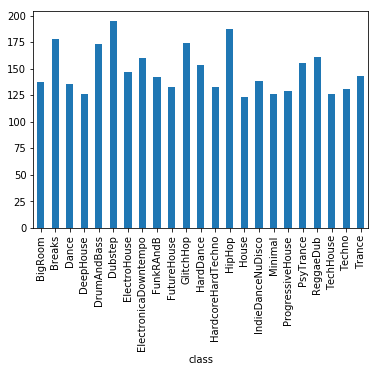

In [9]:
edm.groupby('class')['69-BPM'].mean().plot(kind='bar')

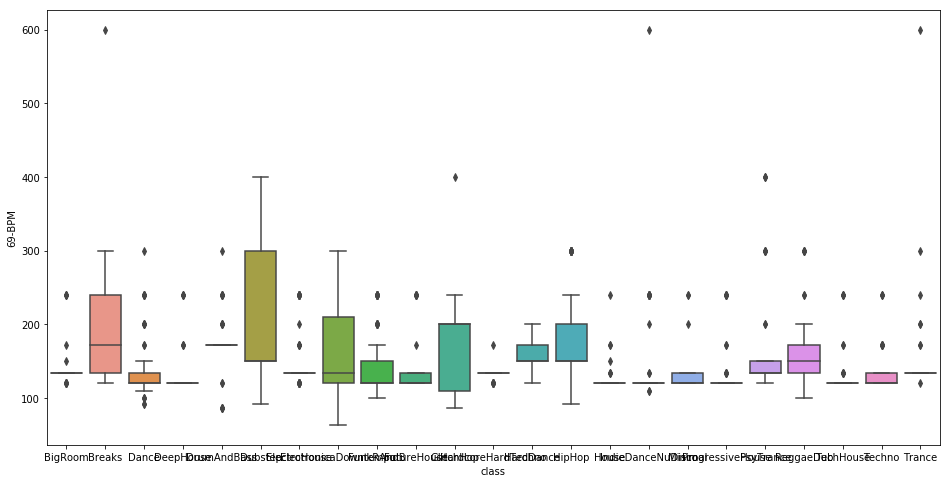

In [10]:
plt.subplots(figsize=(16,8))
sns.boxplot(x=edm['class'], y=edm['69-BPM'], data=edm)

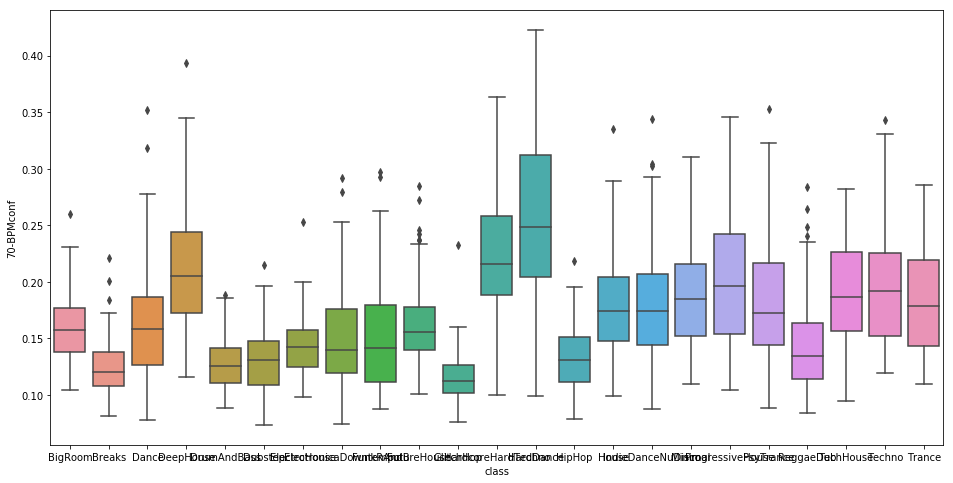

In [11]:
plt.subplots(figsize=(16,8))
sns.boxplot(x=edm['class'], y=edm['70-BPMconf'], data=edm)

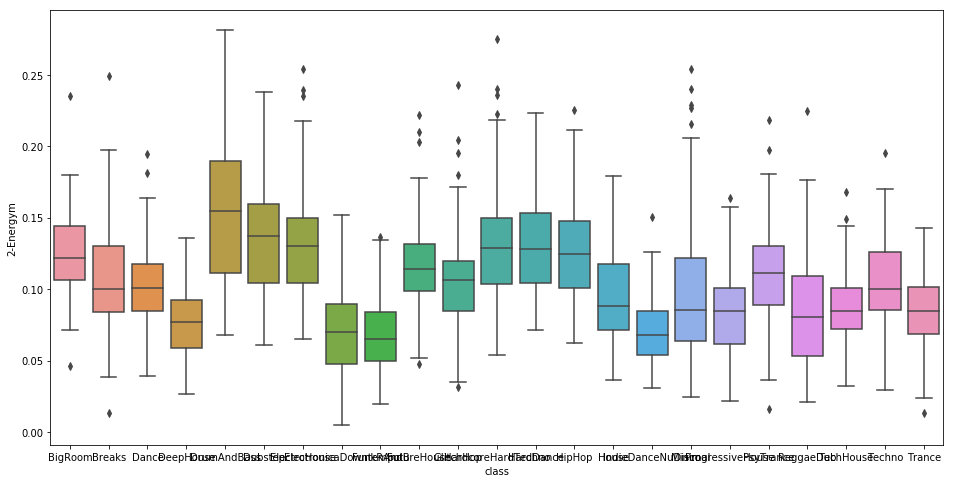

In [12]:
plt.subplots(figsize=(16,8))
sns.boxplot(x=edm['class'], y=edm['2-Energym'], data=edm)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1de51f60>,
      dtype=object)

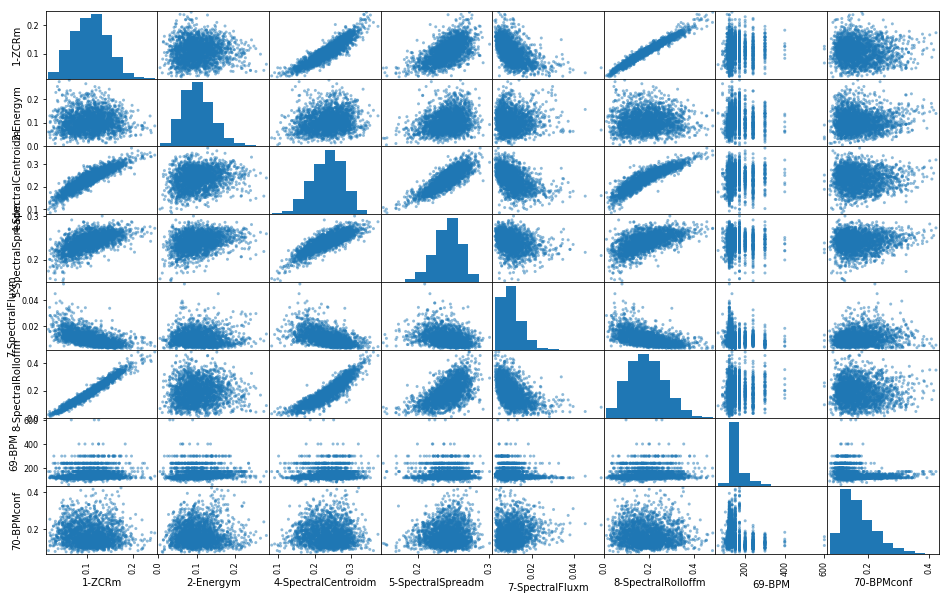

In [13]:
#Note: Data has too many attributes to run a pairplot.  Computer crashed when attempting this.
#Instead: Pick some features that show correlation or dispursion to subgenre
pd.plotting.scatter_matrix(edm[['1-ZCRm', '2-Energym', '4-SpectralCentroidm', '5-SpectralSpreadm', '7-SpectralFluxm', '8-SpectralRolloffm', '69-BPM', '70-BPMconf', 'class']], figsize=(16, 10))

In [14]:
#Identify Correlations
edm.corr()

,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia
Unnamed: 0,1.000000,-0.124584,-0.188475,-0.178966,-0.163065,-0.132570,-0.146254,0.239513,-0.122813,-0.171918,...,0.133072,-0.076381,-0.060552,0.024802,0.167480,-0.082216,-0.037877,-0.123852,0.233495,0.147710
1-ZCRm,-0.124584,1.000000,0.033078,0.348539,0.912761,0.595759,0.962675,-0.561186,0.978607,0.395775,...,-0.298175,0.247777,0.061753,-0.030212,-0.262226,0.067390,-0.090731,0.088046,-0.073170,0.016599
2-Energym,-0.188475,0.033078,1.000000,0.288607,0.197469,0.272648,0.071985,-0.019159,0.039412,0.567044,...,0.081217,-0.075730,-0.193920,-0.186024,-0.016508,-0.196817,0.158034,0.050579,0.024330,-0.002863
3-EnergyEntropym,-0.178966,0.348539,0.288607,1.000000,0.336717,0.183286,0.453793,-0.644043,0.355155,0.690856,...,-0.337512,0.173928,0.049173,-0.099508,-0.282032,0.138648,-0.376002,0.113989,-0.059027,0.045127
4-SpectralCentroidm,-0.163065,0.912761,0.197469,0.336717,1.000000,0.839873,0.869310,-0.513196,0.906615,0.422951,...,-0.185273,0.147813,-0.040089,-0.095008,-0.180876,-0.043222,0.030435,0.083332,-0.033906,-0.011225
5-SpectralSpreadm,-0.132570,0.595759,0.272648,0.183286,0.839873,1.000000,0.513057,-0.318957,0.583824,0.338512,...,0.008856,-0.005255,-0.111838,-0.103817,-0.028115,-0.133070,0.122758,-0.012672,0.080847,0.003914
6-SpectralEntropym,-0.146254,0.962675,0.071985,0.453793,0.869310,0.513057,1.000000,-0.616749,0.955579,0.500660,...,-0.336877,0.289655,0.053790,-0.058402,-0.300791,0.079436,-0.134501,0.111468,-0.087497,0.026117
7-SpectralFluxm,0.239513,-0.561186,-0.019159,-0.644043,-0.513196,-0.318957,-0.616749,1.000000,-0.522341,-0.610108,...,0.548267,-0.244123,-0.122567,0.038589,0.438634,-0.182605,0.459314,-0.153116,0.185354,0.049995
8-SpectralRolloffm,-0.122813,0.978607,0.039412,0.355155,0.906615,0.583824,0.955579,-0.522341,1.000000,0.381630,...,-0.285018,0.214670,0.033130,-0.045322,-0.257362,0.046182,-0.074064,0.097978,-0.051997,0.017745
9-MFCCs1m,-0.171918,0.395775,0.567044,0.690856,0.422951,0.338512,0.500660,-0.610108,0.381630,1.000000,...,-0.242917,0.177587,0.017926,-0.078459,-0.226244,0.063596,-0.219455,0.057129,0.004196,0.076348


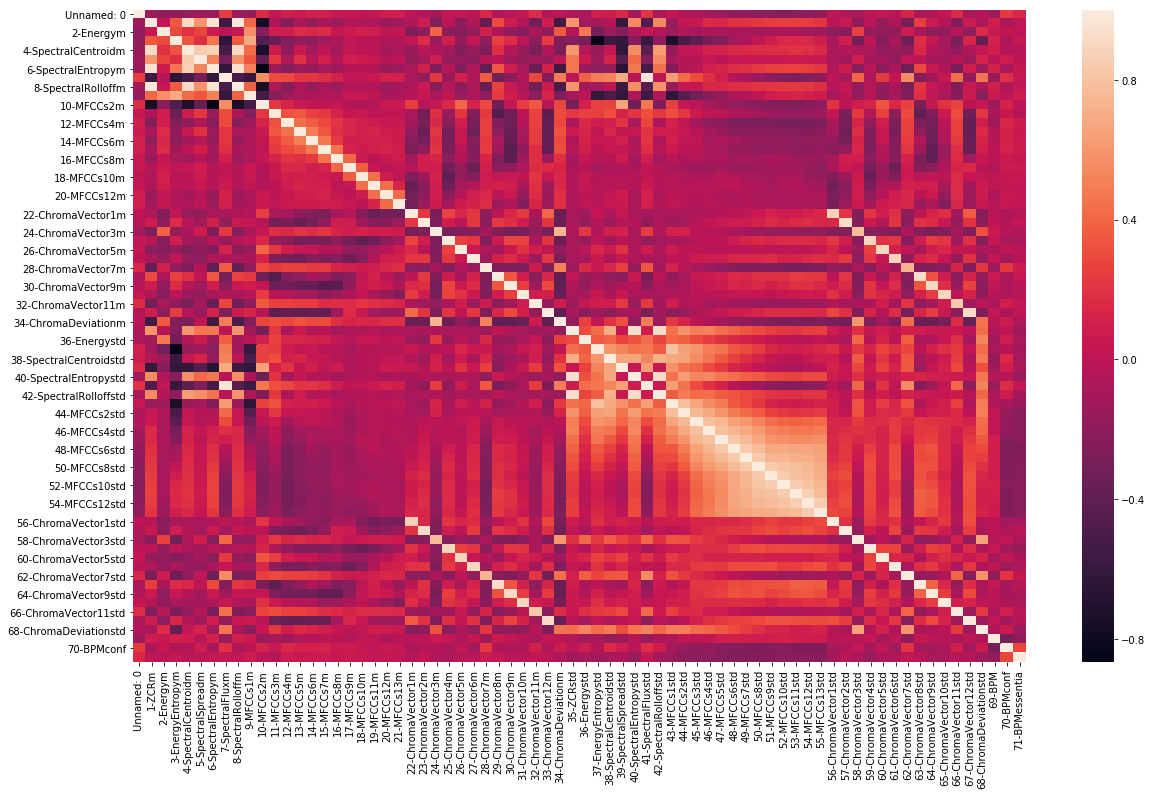

In [15]:
plt.subplots(figsize=(20,12))
sns.heatmap(edm.corr())

In [16]:
edm['class_num'] = edm['class'].factorize()[0]
#Note: Class must be factorized in order to model or find correlations of features to subgenres.

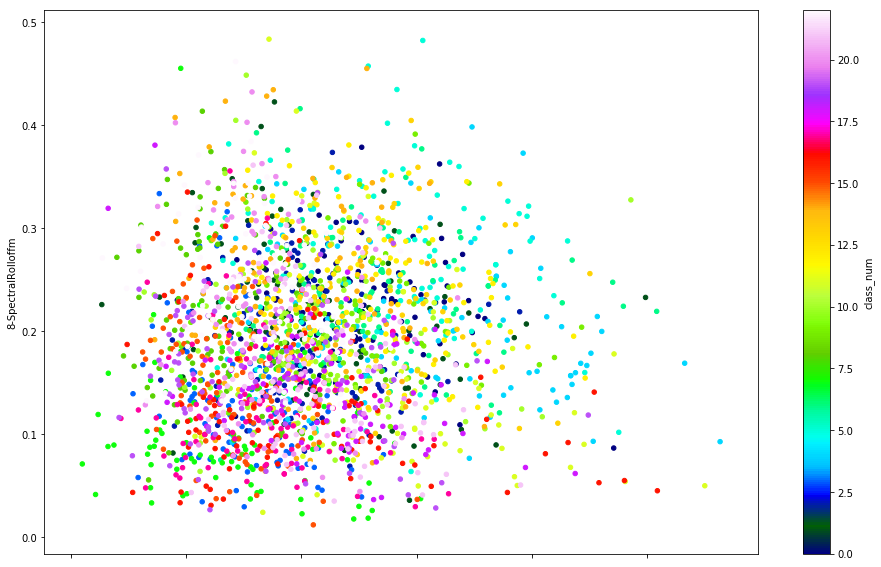

In [17]:
#Now let's visualize how subgenres are/not unique against certain correlated features
edm.plot(kind='scatter', x= '2-Energym', y='8-SpectralRolloffm', c='class_num', colormap='gist_ncar', figsize=(16, 10))

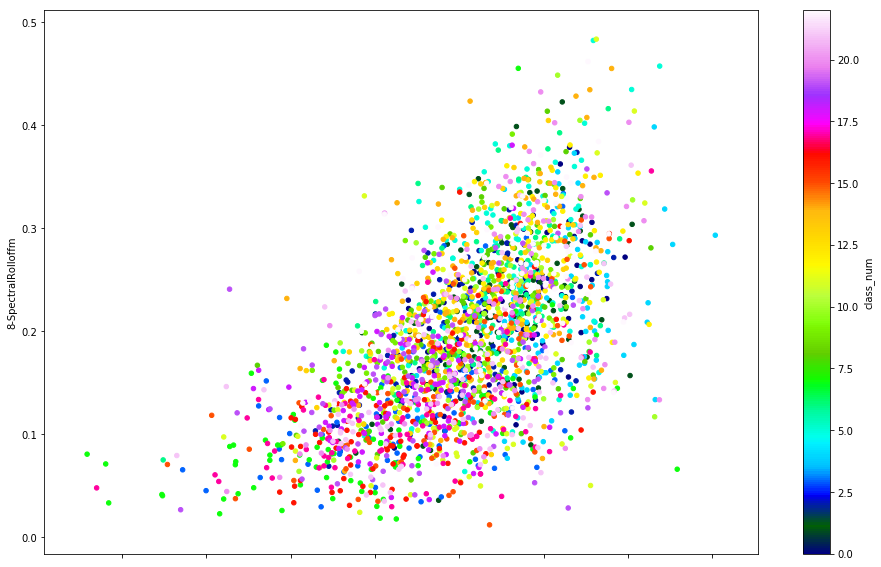

In [18]:
edm.plot(kind='scatter', x= '5-SpectralSpreadm', y='8-SpectralRolloffm', c='class_num', colormap='gist_ncar', figsize=(16, 10))

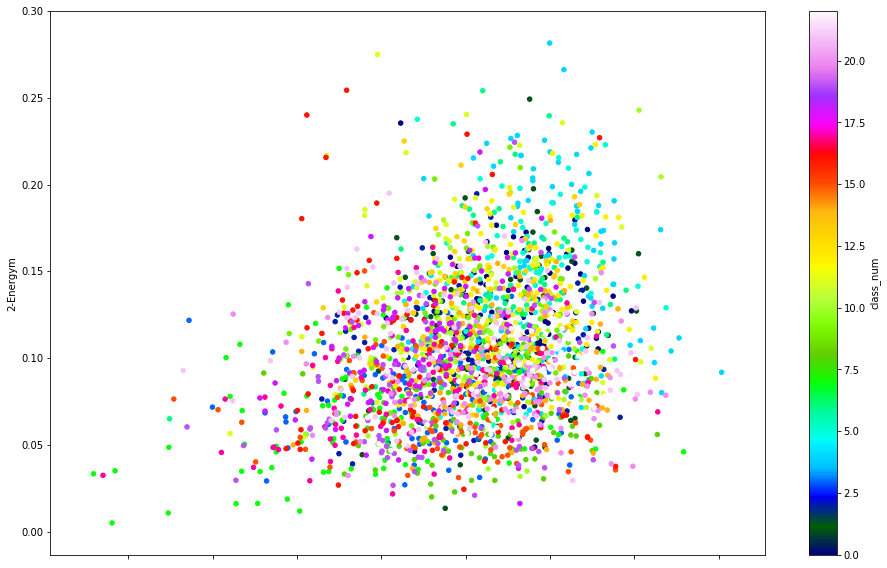

In [19]:
edm.plot(kind='scatter', x= '5-SpectralSpreadm', y='2-Energym', c='class_num', colormap='gist_ncar', figsize=(16, 10))

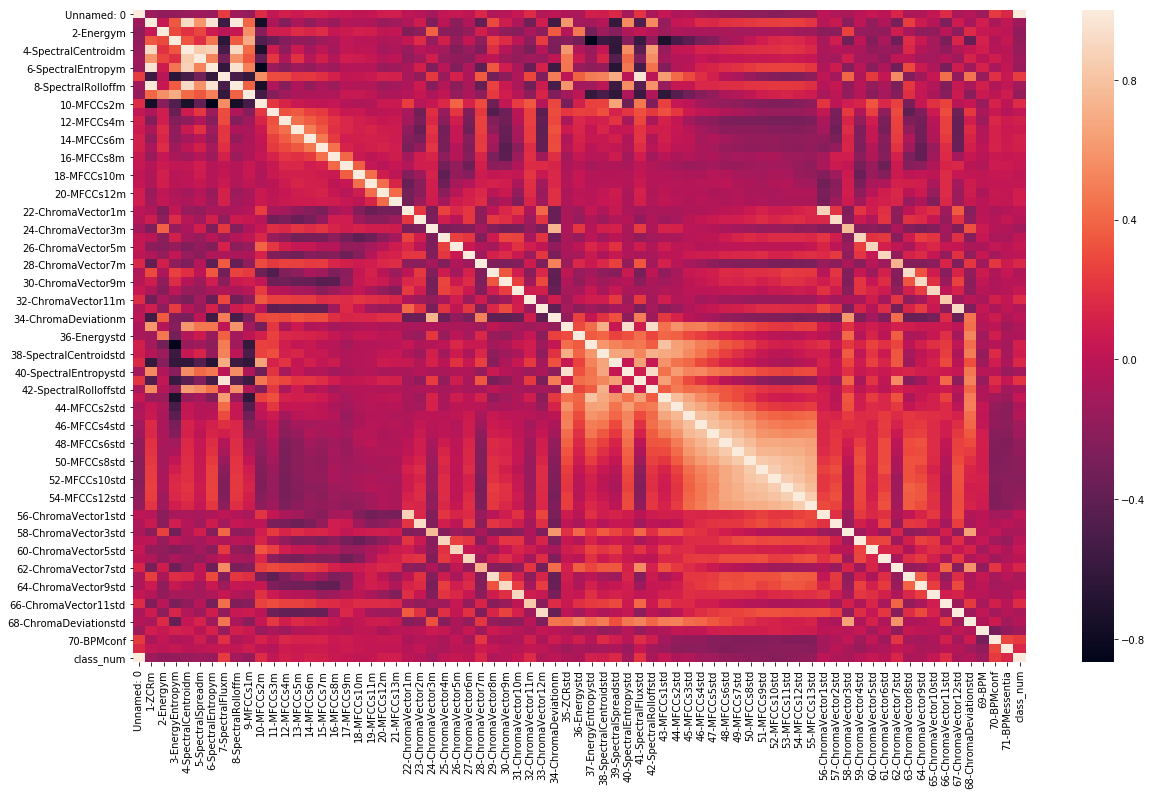

In [20]:
#Correlation heatmap, now with the factorized subgenre/'class_num'
plt.subplots(figsize=(20,12))
sns.heatmap(edm.corr())

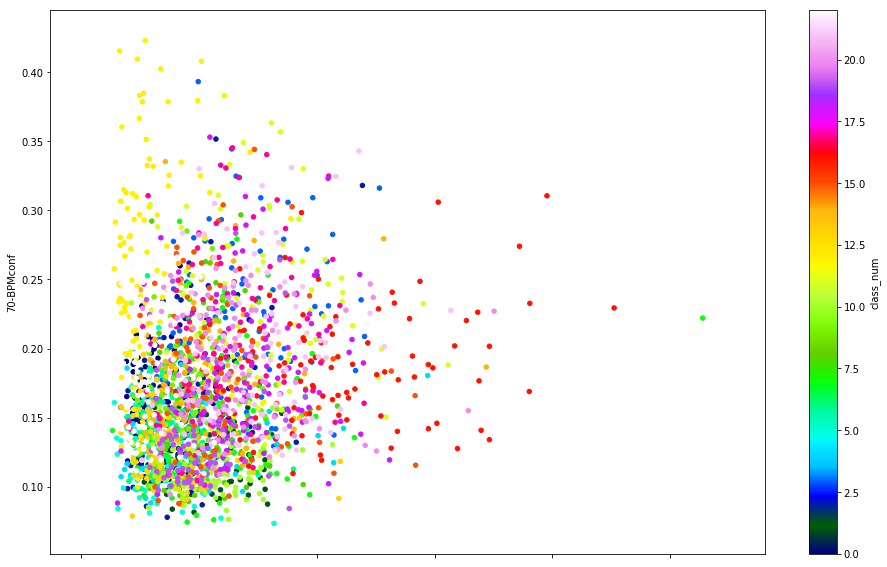

In [21]:
edm.plot(kind='scatter', x= '7-SpectralFluxm', y='70-BPMconf', c='class_num', colormap='gist_ncar', figsize=(16, 10))

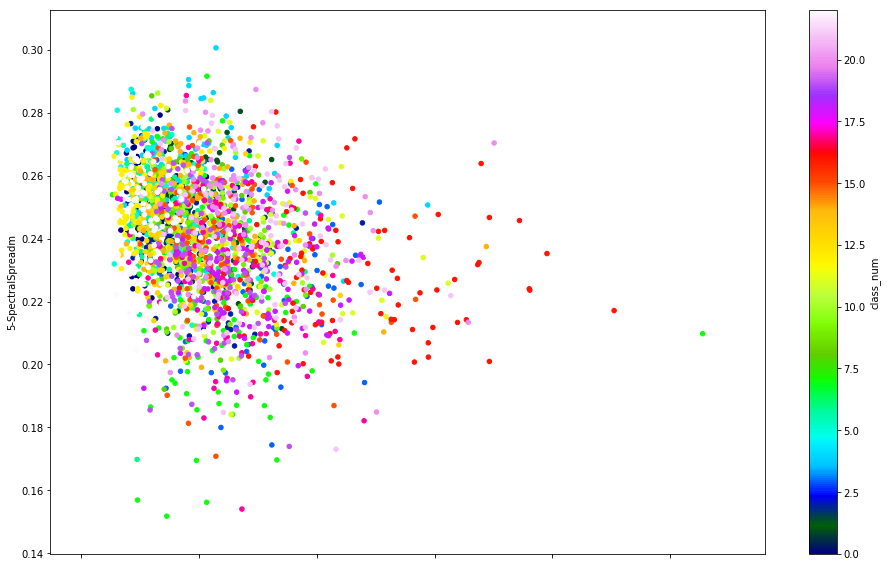

In [22]:
edm.plot(kind='scatter', x= '7-SpectralFluxm', y='5-SpectralSpreadm', c='class_num', colormap='gist_ncar', figsize=(16, 10))

# Feature and Model Selection

## Feature Selection: all 70 attributes won't work!  Pick a few combinations and try modeling.
## Model Selection: K-Nearest Neighbors

In [23]:
#Now let's select features for first set
feat_cols_0 = ['1-ZCRm', '2-Energym', '4-SpectralCentroidm', '5-SpectralSpreadm', '7-SpectralFluxm', '8-SpectralRolloffm', '69-BPM', '70-BPMconf']
X = edm[feat_cols_0]

In [24]:
y = edm.class_num

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.2678260869565217


In [29]:
#30.4%...not bad. maybe reduce train/test split to 50/50?
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

/Users/ericmeyers/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [31]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.2678260869565217


In [32]:
#50/50 test/train is slightly worse.

In [33]:
#now let's try different k values on the full set of data to see optimal k value
scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])
    print("The accuracy score for k={} is {}".format(k, score))

The accuracy score for k=1 is 0.9991304347826087
The accuracy score for k=2 is 0.6356521739130435
The accuracy score for k=3 is 0.5739130434782609
The accuracy score for k=4 is 0.5291304347826087
The accuracy score for k=5 is 0.5139130434782608
The accuracy score for k=6 is 0.4965217391304348
The accuracy score for k=7 is 0.4791304347826087
The accuracy score for k=8 is 0.4691304347826087
The accuracy score for k=9 is 0.4617391304347826
The accuracy score for k=10 is 0.4434782608695652
The accuracy score for k=11 is 0.43782608695652175
The accuracy score for k=12 is 0.43826086956521737
The accuracy score for k=13 is 0.4326086956521739
The accuracy score for k=14 is 0.4308695652173913
The accuracy score for k=15 is 0.42391304347826086
The accuracy score for k=16 is 0.4217391304347826
The accuracy score for k=17 is 0.42043478260869566
The accuracy score for k=18 is 0.41304347826086957
The accuracy score for k=19 is 0.40869565217391307
The accuracy score for k=20 is 0.41130434782608694
Th

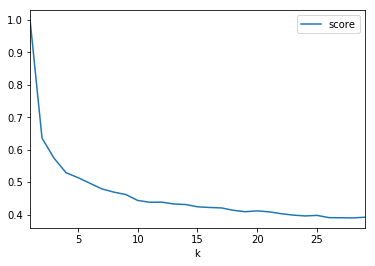

In [34]:
#visualize accuracy score for k=1 - 29
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

Results: It seems that k=1 is by far the best, this makes sense as there are so many categories with seemingly
little categorical differentiation across independant variables

In [35]:
#Now let's try assessing different train/test sizes
#Note: I tried numerous train/test sizes and 75/25 is optimal
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=28)

/Users/ericmeyers/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.28


In [38]:
scores = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])

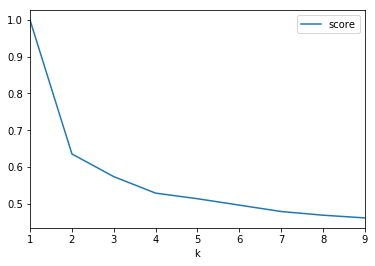

In [39]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [40]:
#Let's try second set of features! (drop Zero Crossing Rate (ZCR) & Spectral Centroid from first set)
feat_cols_1 = ['2-Energym', '5-SpectralSpreadm', '7-SpectralFluxm', '8-SpectralRolloffm', '69-BPM', '70-BPMconf']
X = edm[feat_cols_1]

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [42]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.2573913043478261


In [43]:
#Let's try third set of features! (drop BPM)
feat_cols_2 = ['2-Energym', '5-SpectralSpreadm', '7-SpectralFluxm', '8-SpectralRolloffm', '70-BPMconf']
X = edm[feat_cols_2]

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [45]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.15130434782608695


worst yet!  Let's stick with feat_cols_0

In [46]:
#Maybe the scale of BPM is throwing things off? I will take first feature set and scale feat columns to adjust and test
feat_cols_0 = ['1-ZCRm', '2-Energym', '4-SpectralCentroidm', '5-SpectralSpreadm', '7-SpectralFluxm', '8-SpectralRolloffm', '69-BPM', '70-BPMconf']
X = edm[feat_cols_0]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.28347826086956524


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Calculate testing error
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.7756521739130435


Result: scaling BPM makes the model slightly worse most the time!

# Approach 2: K-means clustering to identify potentially optimized categorizations

In [53]:
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics

In [54]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(edm[feat_cols_0])

In [55]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.297190720661056

In [56]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.20604011328023686

In [57]:
k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.21668431791937431

In [58]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.1923185925507812

In [59]:
#now let's put the new categorizations into main data (alllll the way to the right)
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

edm['kmeans_genre'] = labels
edm.head(15)

,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class,class_num,kmeans_genre
0,0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,...,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,BigRoom,0,0
1,1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,...,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,BigRoom,0,0
2,2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,...,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,BigRoom,0,1
3,3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,...,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,BigRoom,0,0
4,4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,...,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,BigRoom,0,0
5,5,0.127047,0.153488,3.221987,0.261693,0.257361,1.090034,0.004943,0.230099,-21.234846,...,0.010347,0.025008,0.003035,0.019479,133.333333,0.168933,129.0,BigRoom,0,0
6,6,0.123395,0.106206,3.167861,0.245459,0.245342,1.107316,0.008419,0.217213,-22.683738,...,0.011462,0.019006,0.002790,0.013330,133.333333,0.259905,133.0,BigRoom,0,0
7,7,0.140027,0.084697,3.148168,0.267148,0.259155,1.188881,0.007938,0.259598,-22.707077,...,0.006958,0.024556,0.002650,0.014855,133.333333,0.198616,129.0,BigRoom,0,0
8,8,0.117635,0.146972,3.182842,0.243685,0.244968,1.099033,0.005454,0.195807,-20.837815,...,0.013200,0.024580,0.003016,0.013857,133.333333,0.148709,133.0,BigRoom,0,0
9,9,0.137400,0.127166,3.117554,0.297956,0.279300,1.076698,0.006725,0.271957,-22.962992,...,0.012650,0.024557,0.004807,0.019159,133.333333,0.172005,133.0,BigRoom,0,0


results: no better than knn model...k=2 is the optimal cluster number and that still only has silhouette score of 29%
with such a low score AND low k value, this clustering method is not optimal to use
:( womp womp womp

# Approach 3: Apply domain expertise in EDM by creating custom subgenres
## Maybe I can up the accuracy of my classification model

In [60]:
edm['class'].value_counts().sort_index()

BigRoom                 100
Breaks                  100
Dance                   100
DeepHouse               100
DrumAndBass             100
Dubstep                 100
ElectroHouse            100
ElectronicaDowntempo    100
FunkRAndB               100
FutureHouse             100
GlitchHop               100
HardDance               100
HardcoreHardTechno      100
HipHop                  100
House                   100
IndieDanceNuDisco       100
Minimal                 100
ProgressiveHouse        100
PsyTrance               100
ReggaeDub               100
TechHouse               100
Techno                  100
Trance                  100
Name: class, dtype: int64

#For Reference, my new "sub-genre" cross reference from edm['class']

['ElectroHouse','ProgressiveHouse','FutureHouse','DeepHouse','Dance','House','BigRoom']:'House' 
['ReggaeDub','Dubstep']: 'Dub'
['Techno','HardcoreHardTechno','HardDance', 'TechHouse']: 'Techno'
['HipHop','GlitchHop']: 'Hop'
['IndieDanceNuDisco','FunkRAndB']: 'NuDisco'
['PsyTrance','Trance']: 'Trance'
['DrumAndBass','Breaks']: 'TwoStep'
['Minimal','ElectronicaDowntempo']: 'DownTempo'

In [61]:
#Renaming and regrouping subgenre in new field 'sub_genre'
edm = pd.read_csv('beatsdataset.csv')
edm['class_num'] = edm['class'].factorize()[0]

edm['sub_genre'] = edm['class']

edm['sub_genre'][0:100] = 'House'
edm['sub_genre'][100:200] = 'TwoStep'
edm['sub_genre'][200:300] = 'House'
edm['sub_genre'][300:400] = 'House'
edm['sub_genre'][400:500] = 'TwoStep'
edm['sub_genre'][500:600] = 'Dub'
edm['sub_genre'][600:700] = 'House'
edm['sub_genre'][700:800] = 'DownTempo'
edm['sub_genre'][800:900] = 'NuDisco'
edm['sub_genre'][900:1000] = 'House'
edm['sub_genre'][1000:1100] = 'Hop'
edm['sub_genre'][1100:1200] = 'Techno'
edm['sub_genre'][1200:1300] = 'Techno'
edm['sub_genre'][1300:1400] = 'Hop'
edm['sub_genre'][1400:1500] = 'House'
edm['sub_genre'][1500:1600] = 'NuDisco'
edm['sub_genre'][1600:1700] = 'DownTempo'
edm['sub_genre'][1700:1800] = 'House'
edm['sub_genre'][1800:1900] = 'Trance'
edm['sub_genre'][1900:2000] = 'Dub'
edm['sub_genre'][2000:2100] = 'Techno'
edm['sub_genre'][2100:2200] = 'Techno'
edm['sub_genre'][2200:2300] = 'Trance'
edm.sub_genre.value_counts()
#not the BEST way to do this, but it works

/Users/ericmeyers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/ericmeyers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ericmeyers/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ericmeyers/anaconda3/lib/python3.6/site-packages/ipykernel_laun

House        700
Techno       400
TwoStep      200
Dub          200
DownTempo    200
Trance       200
NuDisco      200
Hop          200
Name: sub_genre, dtype: int64

In [62]:
#Factorize sub_genre to prep for model
edm['sub_genre_num'] = edm['sub_genre'].factorize()[0]
edm.sub_genre_num.value_counts()

0    700
6    400
7    200
5    200
3    200
1    200
4    200
2    200
Name: sub_genre_num, dtype: int64

In [63]:
#Note: Now with new sub_genre classification, baseline accuracy is 30.4%
700/2300

0.30434782608695654

In [64]:
#Let's try to up that with a new KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [65]:
feat_cols_0 = ['1-ZCRm', '2-Energym', '4-SpectralCentroidm', '5-SpectralSpreadm', '7-SpectralFluxm', '8-SpectralRolloffm', '69-BPM', '70-BPMconf']
X = edm[feat_cols_0]
y = edm.sub_genre_num

In [66]:
#Now, rerunning and fitting the new classifier with WEIGHTED KNN (distance)
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [69]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.43826086956521737


In [70]:
0.4765-0.3043

0.17219999999999996

Result of manual classification: 47.65%
17.2% more accurate than baseline accuracy with 8 different sub-genres